In [1]:
from library.objective_function import *
from library.optimiser import *
from library.post_analysis import *
from library.experiments import *
%matplotlib inline
SEED = 23191

**naming of objective function**
ackley -> ak 

tuned ackley -> tak

bukin -> bk

egg holder -> eh

**naming of optimizer**

original CMA -> no

line search CMA-> ls

round off CMA-> ro

**naming of experiments**

experiments -> exps + objective function + optimizer + [hyperparameter]

In [4]:
def setup_compsite_cma(inner_opt):
    # One experiment: setup optimizer
    cma = cma_es()
    optmizerParas = {
             'x0': np.zeros((2,)),
             'std': np.ones((2,)) * 3, 
             'tol': 1e-5, 
             'adjust_func': inner_opt, 
             'record': False, 
             'verbose': False}
    cma.set_parameters(optmizerParas)
    return cma
    
def compare_efficiency_ackley(optimizer, seed):
    np.random.seed(seed)

    # init multiple experiments
    mexps = multiple_experiment()

    # init and setup one experiment
    exp = single_experiment()
    # One experiment: setup objective function
    ak = ackley()
    exp.set_objective(ak)
    exp.set_optimizer(optimizer)

    # Multiple experiment: setup one expreiment
    mexps.set_single_exp(exp)
    # Multiple experiments: setup sample zone of multiple experiments
    zoneParas = {'origin': np.array([0,0]),
             'edge': np.array([500, 500]),
             'step': 100,
             'size': 10,
             'sym': True}
    mexps.set_sample_zone(zoneParas)

    data = mexps.do()

## test influence of random seed

In [29]:
inner_optimizer = do_nothing()
composite_optimizer = setup_compsite_cma(inner_optimizer)
for i in [1291, 3, 100, 29383, 3322, 902, 222]:
    %time conmpare_efficency_ackley(composite_optimizer, i)

avg probility of converge:  0.02666666666666667
avg func value:  19.831645846483443
avg evals per exp:  1480.4799999999998


CPU times: user 14.2 s, sys: 134 ms, total: 14.3 s
Wall time: 14.5 s
avg probility of converge:  0.013333333333333334
avg func value:  20.065190191781713
avg evals per exp:  1470.84


CPU times: user 14 s, sys: 117 ms, total: 14.1 s
Wall time: 14.3 s
diverge, raise LinAlgError!
avg probility of converge:  0.02
avg func value:  19.91107105638078
avg evals per exp:  1493.9200000000003


CPU times: user 14.8 s, sys: 158 ms, total: 15 s
Wall time: 15.1 s
avg probility of converge:  0.03333333333333333
avg func value:  19.675662087266524
avg evals per exp:  1446.6000000000001


CPU times: user 13 s, sys: 70.3 ms, total: 13.1 s
Wall time: 13.2 s
avg probility of converge:  0.02666666666666667
avg func value:  19.74227867506498
avg evals per exp:  1387.2


CPU times: user 12 s, sys: 34.5 ms, total: 12 s
Wall time: 12.1 s
avg probility of converge:  0.02666666666666667
a

# 1. orginal Ackley function

## no optimisation


In [3]:
no = do_nothing()
%time compare_efficiency_ackley(no, seed=SEED)

complete: 1 / 15 
complete: 3 / 15 
complete: 6 / 15 
complete: 10 / 15 
complete: 15 / 15 
avg probility of converge:  0.0
avg func value:  21.553441979953742
avg evals per exp:  1.0


CPU times: user 13.4 ms, sys: 3.32 ms, total: 16.7 ms
Wall time: 15 ms


## orginal CMA + original Ackley

In [33]:
inner_optimizer = do_nothing()
composite_optimizer = setup_compsite_cma(inner_optimizer)
%time compare_efficiency_ackley(composite_optimizer, seed=SEED)

avg probility of converge:  0.02666666666666667
avg func value:  19.821937003313206
avg evals per exp:  1459.48


CPU times: user 12.6 s, sys: 22.9 ms, total: 12.6 s
Wall time: 12.6 s


In [39]:
# time per evalutations (s)
12.6 / 150 / 1459

5.7573680603152835e-05

## adam-CMA + original Ackley

In [ ]:
inner_optimizer = adam()
optmizerParas = {'x0': np.zeros((2,)),
         'alpha': 1.5,
         'beta_1': 0.9, 
         'beta_2': 0.999, 
         'epsilon': 1e-8, 
         'max_iter': 100,
         'tol': 1e-2,              
         'verbose': False,
         'record': False}
inner_optimizer.set_parameters(optmizerParas)
composite_optimizer = setup_compsite_cma(inner_optimizer)
%time compare_efficiency_ackley(composite_optimizer, seed=SEED)

## line-search-CMA + original Ackley

In [39]:
inner_optimizer = line_search()
composite_optimizer = setup_compsite_cma(inner_optimizer)
%time compare_efficiency_ackley(composite_optimizer, seed=SEED)

diverge, raise LinAlgError!
avg probility of converge:  0.4133333333333333
avg func value:  11.733333588932046
avg evals per exp:  70947.87333333334


CPU times: user 3min 19s, sys: 1.17 s, total: 3min 20s
Wall time: 3min 28s


In [40]:
228 / 70947 / 150

2.1424443598742724e-05

## adam + original Ackley

In [44]:
ad = adam()
%time compare_efficiency_ackley(ad, seed=SEED)

avg probility of converge:  0.0
avg func value:  19.97863731361894
avg evals per exp:  144.18666666666664


CPU times: user 890 ms, sys: 12.2 ms, total: 902 ms
Wall time: 901 ms


In [45]:
0.901 / 150 / 144

4.171296296296297e-05

## line search + original Ackley

In [30]:
ls = line_search()
%time compare_efficiency_ackley(ls, seed=SEED)

avg probility of converge:  0.0
avg func value:  19.9743627591425
avg evals per exp:  39.89333333333334


CPU times: user 119 ms, sys: 3.68 ms, total: 123 ms
Wall time: 121 ms


In [31]:
0.121 / 40 / 150

2.0166666666666664e-05

## summary on original ackley
| --      | adam | line search | original CMA | line search - CMA | adam-CMA | no optimisation |
| --      | --   |          -- | --           | --                |       -- |              -- |
| #experiments | <td colspan=3>150 times of optimisation</td> 
|total time          |  0.9 s | 0.12 s      | 12.6s       |  199 s        |     818 s   |   0.01 s      |
|evalutaions per exp | 0.14 k | 39.9 k evals|1.46 k evals |  70.9 k evals |156.4 k evals| 0.001 k evals |  
|*performance*       |     -- | --          |          -- |            -- | --          | --            |
|cost                | 19.98  |  19.98      |   19.82     | 11.73         |     16.27   |      21.55    |
|probability         | 0      |     0       |    3%.      |     41%       |       19%   |        0      | 


# 2. Bukin function

In [17]:
def compare_efficiency_bukin(optimizer, seed):
    np.random.seed(seed)

    # init multiple experiments
    mexps = multiple_experiment()

    # init and setup one experiment
    exp = single_experiment()
    # One experiment: setup objective function
    bk = bukin()
    exp.set_objective(bk)
    exp.set_optimizer(optimizer)

    # Multiple experiment: setup one expreiment
    mexps.set_single_exp(exp)
    # Multiple experiments: setup sample zone of multiple experiments
    zoneParas = {'origin': np.array([-15,-15]),
             'edge': np.array([30, 30]),
             'step': 10,
             'size': 10,
             'sym': False}
    mexps.set_sample_zone(zoneParas)

    data = mexps.do()
    
    print("avg probility of converge: ", data['res'].mean())
    print("avg func value: ", data['cost'].mean())
    print("avg evals per exp: ", data['evals'].mean())
    print("\n")
    return data

## no optimisation

In [4]:
dn = do_nothing(verbose=False)
%time data = compare_efficiency_bukin(dn, seed=SEED)

avg probility of converge:  0.0
avg func value:  260.01946408646216
avg evals per exp:  1.0


CPU times: user 6.27 ms, sys: 2.04 ms, total: 8.31 ms
Wall time: 6.55 ms


In [5]:
0.0655 / 90 

0.0007277777777777778

## adam + bukin func

In [35]:
ad = adam()
%time data = compare_efficiency_bukin(ad, seed=SEED)

avg probility of converge:  0.0
avg func value:  11.362796385278592
avg evals per exp:  7224.9


CPU times: user 21 s, sys: 210 ms, total: 21.2 s
Wall time: 21.7 s


In [36]:
21.7 / 90 / 7224

3.3376399655469424e-05

## line search + bukin

In [12]:
ls = line_search()
optmizerParas = {'x0': np.zeros((2,)),
         'alpha': 1,
         'beta': 0.1, 
         'max_iter': 1000,
         'tol': 1e-2,              
         'verbose': False,
         'record': False}
ls.set_parameters(optmizerParas)

%time data_ls_bk = compare_efficiency_bukin(ls, seed=SEED)

avg probility of converge:  0.4555555555555555
avg func value:  0.12478531793284657
avg evals per exp:  2088.988888888889


CPU times: user 1.96 s, sys: 13.2 ms, total: 1.98 s
Wall time: 2 s


In [39]:
data_ls_bk

{'x': array([[-15.,  -5.,   5.],
        [-15.,  -5.,   5.],
        [-15.,  -5.,   5.]]),
 'y': array([[  5.,   5.,   5.],
        [ -5.,  -5.,  -5.],
        [-15., -15., -15.]]),
 'mask': array([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]], dtype=uint8),
 'res': array([[1. , 0.6, 0. ],
        [1. , 0.3, 0. ],
        [1. , 0.2, 0. ]]),
 'cost': array([[0.04252106, 0.10433405, 0.24025312],
        [0.02799697, 0.11619172, 0.20358712],
        [0.02977672, 0.12432748, 0.23407963]]),
 'evals': array([[2088.7, 2093.5, 2084.5],
        [2087.2, 2095.1, 2086.3],
        [2087.7, 2092.9, 2085. ]])}

In [31]:
1.8 / 2089 / 90

9.573958831977022e-06

## original cma + bukin

In [3]:
cma = cma_es()
paras = {'x0': np.zeros((2,)),
         'std': np.ones((2,)) * 0.003, 
         'tol': 1e-5, 
         'adjust_func': do_nothing(), 
         'record': False, 
         'verbose': False}
cma.set_parameters(paras)
%time data = compare_efficiency_bukin(cma, seed=SEED)

diverge, concentrate in low dimension manifold
diverge, concentrate in low dimension manifold
diverge, concentrate in low dimension manifold
diverge, concentrate in low dimension manifold
diverge, concentrate in low dimension manifold
diverge, concentrate in low dimension manifold
avg probility of converge:  0.0
avg func value:  0.9873887672079006
avg evals per exp:  2389.3999999999996


CPU times: user 12.5 s, sys: 67.1 ms, total: 12.6 s
Wall time: 12.7 s


In [4]:
data

{'x': array([[-15.,  -5.,   5.],
        [-15.,  -5.,   5.],
        [-15.,  -5.,   5.]]),
 'y': array([[  5.,   5.,   5.],
        [ -5.,  -5.,  -5.],
        [-15., -15., -15.]]),
 'mask': array([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]], dtype=uint8),
 'res': array([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]),
 'cost': array([[0.42778181, 0.25823846, 3.38802278],
        [1.12686907, 0.26793981, 0.87462486],
        [0.8038382 , 1.57245936, 0.16672455]]),
 'evals': array([[2398.8, 2397.6, 2385.6],
        [2399.4, 2400. , 2400. ],
        [2332.2, 2400. , 2391. ]])}

In [5]:
12.7 / 90 / 2389

5.90670201385982e-05

## line-search-cma + bukin

In [ ]:
cma = cma_es()
paras = {'x0': np.zeros((2,)),
         'std': np.ones((2,)) * 0.003, 
         'tol': 1e-5, 
         'adjust_func': line_search(alpha=1e-5, beta=2e-5), 
         'record': False, 
         'verbose': True}
cma.set_parameters(paras)
%time data = compare_efficiency_bukin(cma, seed=SEED)

In [6]:
data

{'x': array([[-15.,  -5.,   5.],
        [-15.,  -5.,   5.],
        [-15.,  -5.,   5.]]),
 'y': array([[  5.,   5.,   5.],
        [ -5.,  -5.,  -5.],
        [-15., -15., -15.]]),
 'mask': array([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]], dtype=uint8),
 'res': array([[1. , 0.9, 1. ],
        [1. , 0.9, 1. ],
        [1. , 1. , 0.9]]),
 'cost': array([[3.27603230e-06, 2.61121374e+00, 2.27950007e-04],
        [2.51539799e-06, 9.63918122e+01, 2.42287062e-06],
        [3.09460454e-06, 9.44530163e-07, 1.93736556e+00]]),
 'evals': array([[265629.5, 218364. , 283121.4],
        [236491.8, 262611.5, 317096.7],
        [212104.4, 215871.8, 383664.2]])}

In [ ]:
## one case of diverge

*******starting optimisation from intitial mean:  [-2.07243989 -0.3797777 ]

diverge, raise LinAlgError!

eigenvalue of variance = [       nan 0.00019923]

total iterations = 75, total evaluatios = 99531

found minimum position = [-203.29567204  320.75917861], found minimum = 963.8691504042331

Result:  diverge

found minimum: 963.8691504042331, minimum position: [-203.29567204  320.75917861], evals: 99531

In [ ]:
## one case of not converge

*******starting optimisation from intitial mean:  [ 5.26336317 -8.49785954]

eigenvalue of variance = [5.14172784e-12 9.15848313e-11]

total iterations = 400, total evaluatios = 539221

found minimum position = [-12.49672561   1.52424477], found minimum = 19.37354450370227

Result:  local minimum

found minimum: 19.37354450370227, minimum position: [-12.49672561   1.52424477], evals: 539221


In [11]:
data['cost'][data['cost'] < 1 ].mean()

4.0033907020675074e-05

In [7]:
280 / 90 / 266106

1.1691247514566042e-05

## adam CMA + bukin

In [35]:
ad = adam()
optmizerParas = {'x0': np.zeros((2,)),
         'alpha': 0.0001,
         'beta_1': 0.9, 
         'beta_2': 0.999, 
         'epsilon': 1e-8, 
         'max_iter': 10,
         'tol': 1e-2,              
         'verbose': False,
         'record': False}
ad.set_parameters(optmizerParas)
cma = cma_es()
paras = {'x0': np.zeros((2,)),
         'std': np.ones((2,)) * 0.003, 
         'tol': 1e-5, 
         'adjust_func': ad, 
         'record': False, 
         'verbose': False}
cma.set_parameters(paras)
%time data = compare_efficiency_bukin(cma, seed=SEED + 11212)

avg probility of converge:  0.0
avg func value:  1.4041556031468763
avg evals per exp:  22648.088888888888


CPU times: user 1min, sys: 236 ms, total: 1min
Wall time: 1min 1s


In [29]:
64 / 90 / 22370

3.1788605771618734e-05

## summary of bukin
| -- | Adam | line search(large max_iter)  | CMA | line-search CMA | Adam CMA | no optimisation
| -- | -- | -- | -- | -- | -- | -- |
| #experiments| 90 experiments | 90 experiments | 90 experiments | 90 experiments | 90 experiments | 90 experiments |
| total time | 21.7 s | 1.8 s | 12.7 s | 263 s | 64 s | 0.007 s |
| evalutaions per exp | 7.2 k evals |  2.1 k evals | 2.4 k evals | 266 k evals  | 22.4 k evals | 0.001 k evals
| cost | 11.36 | 0.12 | 0.99 | 11.22 (4e-5) | 0.89 | 260 |
| prob | 0 | 46% | 0 | 97% | 0 | 0 | 

# 3. Tuned Ackley

In [28]:
def compare_efficiency_tunned_ackley(optimizer, seed):
    np.random.seed(seed)

    # init multiple experiments
    mexps = multiple_experiment()

    # init and setup one experiment
    exp = single_experiment()
    # One experiment: setup objective function
    tak = tuned_ackley()
    exp.set_objective(tak)
    exp.set_optimizer(optimizer)

    # Multiple experiment: setup one expreiment
    mexps.set_single_exp(exp)
    # Multiple experiments: setup sample zone of multiple experiments
    zoneParas = {'origin': np.array([0, 0]),
             'edge': np.array([20, 20]),
             'step': 4,
             'size': 10,
             'sym': True}
    mexps.set_sample_zone(zoneParas)

    data = mexps.do()
    num = zoneParas['edge'][0] / zoneParas['step']
    num = (num + 1) * num / 2
    print("avg probility of converge: ", data['res'].sum() / num)
    print("avg func value: ", data['cost'].sum() / num)
    print("avg evals per exp: ", data['evals'].sum() / num)
    print("\n")
    return data

/Users/huajian/Non-convex/library/objective_function.py:75: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



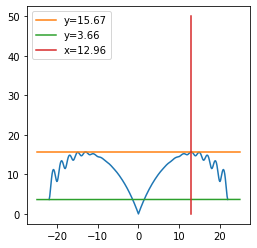

In [21]:
tuned_ackley().visualise2d_section(0, 'x')

## no optimisation

In [22]:
no = do_nothing()
%time data = compare_efficiency_tunned_ackley(no, seed=SEED)

avg probility of converge:  0.0
avg func value:  18.351217369003276
avg evals per exp:  1.0


CPU times: user 11.3 ms, sys: 3.19 ms, total: 14.5 ms
Wall time: 11.8 ms


In [23]:
0.0118 / 150

7.866666666666666e-05

## adam + tuned ackley

In [29]:
ad = adam(verbose=False)
%time data = compare_efficiency_tunned_ackley(ad, seed=SEED)

avg probility of converge:  0.2
avg func value:  15.082240830655659
avg evals per exp:  121.72


CPU times: user 822 ms, sys: 12.8 ms, total: 835 ms
Wall time: 835 ms


In [31]:
0.822 / 121 / 150

4.52892561983471e-05

In [30]:
data

{'x': array([[ 0.,  0.,  0.,  0., 16.],
        [ 0.,  0.,  0., 12., 16.],
        [ 0.,  0.,  8., 12., 16.],
        [ 0.,  4.,  8., 12., 16.],
        [ 0.,  4.,  8., 12., 16.]]),
 'y': array([[ 0.,  0.,  0.,  0., 16.],
        [ 0.,  0.,  0., 12., 12.],
        [ 0.,  0.,  8.,  8.,  8.],
        [ 0.,  4.,  4.,  4.,  4.],
        [ 0.,  0.,  0.,  0.,  0.]]),
 'mask': array([[1, 1, 1, 1, 0],
        [1, 1, 1, 0, 0],
        [1, 1, 0, 0, 0],
        [1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0]], dtype=uint8),
 'res': array([[0. , 0. , 0. , 0. , 0. ],
        [0. , 0. , 0. , 0. , 0. ],
        [0. , 0. , 0. , 0. , 0. ],
        [0. , 0.8, 0. , 0. , 0. ],
        [1. , 1. , 0.2, 0. , 0. ]]),
 'cost': array([[ 0.        ,  0.        ,  0.        ,  0.        , 50.        ],
        [ 0.        ,  0.        ,  0.        ,  8.45234363, 45.83414631],
        [ 0.        ,  0.        , 14.69570773, 11.92313093, 16.65887943],
        [ 0.        ,  2.98882763, 14.77833665, 13.8746298 , 10.4002702

## line search + tuned ackley

In [32]:
ls = line_search()
%time data = compare_efficiency_tunned_ackley(ls, seed=SEED)

avg probility of converge:  0.26666666666666666
avg func value:  13.302264371883025
avg evals per exp:  312.38666666666666


CPU times: user 909 ms, sys: 20.9 ms, total: 930 ms
Wall time: 919 ms


In [33]:
0.919 / 312 / 150

1.9636752136752138e-05

In [34]:
data

{'x': array([[ 0.,  0.,  0.,  0., 16.],
        [ 0.,  0.,  0., 12., 16.],
        [ 0.,  0.,  8., 12., 16.],
        [ 0.,  4.,  8., 12., 16.],
        [ 0.,  4.,  8., 12., 16.]]),
 'y': array([[ 0.,  0.,  0.,  0., 16.],
        [ 0.,  0.,  0., 12., 12.],
        [ 0.,  0.,  8.,  8.,  8.],
        [ 0.,  4.,  4.,  4.,  4.],
        [ 0.,  0.,  0.,  0.,  0.]]),
 'mask': array([[1, 1, 1, 1, 0],
        [1, 1, 1, 0, 0],
        [1, 1, 0, 0, 0],
        [1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0]], dtype=uint8),
 'res': array([[0. , 0. , 0. , 0. , 0. ],
        [0. , 0. , 0. , 0. , 0. ],
        [0. , 0. , 0. , 0. , 0. ],
        [0. , 1. , 0.1, 0. , 0. ],
        [1. , 1. , 0.9, 0. , 0. ]]),
 'cost': array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         5.00000000e+01],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 7.75027168e+00,
         4.58193259e+01],
        [0.00000000e+00, 0.00000000e+00, 1.46091882e+01, 1.10650532e+01,
         1.14799717e+01],

## CMA + tuned ackley

In [35]:
cma = cma_es()
%time data = compare_efficiency_tunned_ackley(cma, seed=SEED)

/Users/huajian/Non-convex/library/optimiser.py:166: RuntimeWarning:

invalid value encountered in sqrt

/Users/huajian/miniconda3/envs/ada/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning:

invalid value encountered in reduce

/Users/huajian/Non-convex/library/optimiser.py:58: RuntimeWarning:

invalid value encountered in less

/Users/huajian/Non-convex/library/optimiser.py:61: RuntimeWarning:

invalid value encountered in less



diverge, raise LinAlgError!
avg probility of converge:  0.4666666666666667
avg func value:  4.039800380234636
avg evals per exp:  460.5200000000001


CPU times: user 4.66 s, sys: 39.1 ms, total: 4.7 s
Wall time: 4.78 s


In [36]:
4.78 / 460.5 / 150

6.920014477017735e-05

In [9]:
data

{'x': array([[ 0.,  0.,  0., 15.],
        [ 0.,  0., 10., 15.],
        [ 0.,  5., 10., 15.],
        [ 0.,  5., 10., 15.]]),
 'y': array([[ 0.,  0.,  0., 15.],
        [ 0.,  0., 10., 10.],
        [ 0.,  5.,  5.,  5.],
        [ 0.,  0.,  0.,  0.]]),
 'mask': array([[1, 1, 1, 0],
        [1, 1, 0, 0],
        [1, 0, 0, 0],
        [0, 0, 0, 0]], dtype=uint8),
 'res': array([[0. , 0. , 0. , 0.3],
        [0. , 0. , 0. , 0.1],
        [0. , 0.7, 0.4, 0.2],
        [1. , 1. , 0.6, 0. ]]),
 'cost': array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.67788320e+00],
        [0.00000000e+00, 0.00000000e+00, 5.37878028e+00, 5.01785999e+00],
        [0.00000000e+00, 1.63145800e+00, 3.51508469e+00, 9.01399769e+00],
        [4.36048074e-06, 5.85806498e-06, 2.20453001e+00, 4.81041004e+00]]),
 'evals': array([[  0. ,   0. ,   0. , 535.8],
        [  0. ,   0. , 293.4, 510. ],
        [  0. , 451.8, 390. , 799.2],
        [403.2, 438.6, 450. , 504. ]])}

## line search-CMA + tuned Ackley

In [44]:
ls = line_search()
cma = setup_compsite_cma(ls)
%time data_ls = compare_efficiency_tunned_ackley(cma, seed=SEED)

diverge, raise LinAlgError!
avg probility of converge:  0.62
avg func value:  3.572309504005057
avg evals per exp:  26086.960000000003


CPU times: user 1min 18s, sys: 519 ms, total: 1min 19s
Wall time: 1min 20s


In [38]:
75 / 150 / 25482

1.9621693744604034e-05

In [45]:
data_ls

{'x': array([[ 0.,  0.,  0.,  0., 16.],
        [ 0.,  0.,  0., 12., 16.],
        [ 0.,  0.,  8., 12., 16.],
        [ 0.,  4.,  8., 12., 16.],
        [ 0.,  4.,  8., 12., 16.]]),
 'y': array([[ 0.,  0.,  0.,  0., 16.],
        [ 0.,  0.,  0., 12., 12.],
        [ 0.,  0.,  8.,  8.,  8.],
        [ 0.,  4.,  4.,  4.,  4.],
        [ 0.,  0.,  0.,  0.,  0.]]),
 'mask': array([[1, 1, 1, 1, 0],
        [1, 1, 1, 0, 0],
        [1, 1, 0, 0, 0],
        [1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0]], dtype=uint8),
 'res': array([[0. , 0. , 0. , 0. , 0.2],
        [0. , 0. , 0. , 0.4, 0.5],
        [0. , 0. , 1. , 0.1, 0.3],
        [0. , 1. , 0.9, 0.6, 0.4],
        [1. , 1. , 1. , 0.7, 0.2]]),
 'cost': array([[ 0.        ,  0.        ,  0.        ,  0.        ,  3.64475747],
        [ 0.        ,  0.        ,  0.        ,  2.71598595,  2.26332163],
        [ 0.        ,  0.        ,  0.        ,  8.69740601,  3.26242175],
        [ 0.        ,  0.        ,  0.45266433,  6.29479158,  7.2001200

## adam-CMA + tuned Ackley

In [39]:
ad = adam()
cma = setup_compsite_cma(ad)
%time data = compare_efficiency_tunned_ackley(cma, seed=SEED)

avg probility of converge:  0.5399999999999999
avg func value:  2.8546604586432265
avg evals per exp:  14541.12


CPU times: user 2min 6s, sys: 615 ms, total: 2min 7s
Wall time: 2min 8s


In [40]:
128 / 150 / 14541 

5.8684638837310596e-05

In [42]:
data

{'x': array([[ 0.,  0.,  0.,  0., 16.],
        [ 0.,  0.,  0., 12., 16.],
        [ 0.,  0.,  8., 12., 16.],
        [ 0.,  4.,  8., 12., 16.],
        [ 0.,  4.,  8., 12., 16.]]),
 'y': array([[ 0.,  0.,  0.,  0., 16.],
        [ 0.,  0.,  0., 12., 12.],
        [ 0.,  0.,  8.,  8.,  8.],
        [ 0.,  4.,  4.,  4.,  4.],
        [ 0.,  0.,  0.,  0.,  0.]]),
 'mask': array([[1, 1, 1, 1, 0],
        [1, 1, 1, 0, 0],
        [1, 1, 0, 0, 0],
        [1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0]], dtype=uint8),
 'res': array([[0. , 0. , 0. , 0. , 0.5],
        [0. , 0. , 0. , 0.3, 0.4],
        [0. , 0. , 0.4, 0.5, 0. ],
        [0. , 1. , 1. , 0.4, 0.1],
        [1. , 1. , 0.9, 0.4, 0.2]]),
 'cost': array([[ 0.        ,  0.        ,  0.        ,  0.        , 11.48285301],
        [ 0.        ,  0.        ,  0.        ,  3.42885823,  2.84012799],
        [ 0.        ,  0.        ,  2.8628073 ,  2.45936091,  4.73647529],
        [ 0.        ,  0.01649462,  0.01527494,  2.79359517,  4.4442245

## summary on tuned ackley
| --      | adam | line search | original CMA | line search - CMA | adam-CMA | no optimisation |
| --      | --   |          -- | --           | --                |       -- |              -- |
| #experiments | <td colspan=3>150 times of optimisation</td> 
|total time          |  0.8 s  | 0.9 s      |  4.7 s       |  75 s         |     128 s      |   0.012 s     |
|evalutaions per exp | 0.12 k evals| 0.31 k evals| 0.46 k evals| 26.1 k evals | 14.5 k evals|   1 evals     |  
|*performance*       |     --  | --           |          -- |            -- | --            | --            |
|cost                | 15.1   |  13.3         |   4.0       |  3.6          |   2.9     |      18.35    |
|probability         |  20%    |     27%      |    47%      |     62%       |    54%    |        0      | 
 


# 4.egg holder function

In [4]:
def compare_efficiency_eggholder(optimizer, seed):
    np.random.seed(seed)

    # init multiple experiments
    mexps = multiple_experiment()

    # init and setup one experiment
    exp = single_experiment()
    # One experiment: setup objective function
    egg = eggholder()
    exp.set_objective(egg)
    exp.set_optimizer(optimizer)

    # Multiple experiment: setup one expreiment
    mexps.set_single_exp(exp)
    # Multiple experiments: setup sample zone of multiple experiments
    zoneParas = {'origin': np.array([-550,-550]),
             'edge': np.array([1100, 1100]),
             'step': 220,
             'size': 10,
             'sym': False}
    mexps.set_sample_zone(zoneParas)

    data = mexps.do()
    
    print("avg probility of converge: ", data['res'].mean())
    print("avg func value: ", data['cost'].mean())
    print("avg evals per exp: ", data['evals'].mean())
    print("\n")
    return data

## 1) no optimisation

In [50]:
no = do_nothing()
%time data_no = compare_efficiency_eggholder(no, seed=SEED) 

avg probility of converge:  0.0
avg func value:  940.7661800687855
avg evals per exp:  1.0


CPU times: user 18.1 ms, sys: 4.54 ms, total: 22.6 ms
Wall time: 19.4 ms


In [51]:
0.0194 / 150

0.00012933333333333332

## 2) adam + eggholder

In [53]:
ad = adam()
%time data_ad = compare_efficiency_eggholder(ad, seed=SEED)

avg probility of converge:  0.0
avg func value:  715.2890093030913
avg evals per exp:  1567.9119999999998


CPU times: user 15.5 s, sys: 114 ms, total: 15.6 s
Wall time: 15.6 s


In [55]:
15.6 / 150 / 1568

6.63265306122449e-05

## 3) line search + eggholder

In [56]:
ls = line_search()
%time data_ls = compare_efficiency_eggholder(ls, seed=SEED)

avg probility of converge:  0.0
avg func value:  463.62860656254315
avg evals per exp:  236.65200000000002


CPU times: user 1.3 s, sys: 7.14 ms, total: 1.31 s
Wall time: 1.31 s


In [59]:
1.31 / 150 / 237

3.684950773558369e-05

## 4) CMA + eggholder 

In [50]:
cma = setup_compsite_cma(do_nothing())
%time data_cma = compare_efficiency_eggholder(cma, seed=SEED)

avg probility of converge:  0.0
avg func value:  436.2934001737606
avg evals per exp:  267.216


CPU times: user 4.7 s, sys: 37.9 ms, total: 4.74 s
Wall time: 4.86 s


In [10]:
8.49/ 150 / 523

0.00010822179732313576

## 5) line-search-CMA + eggholder

In [46]:
def setup_compsite_cma(inner_opt):
    # One experiment: setup optimizer
    cma = cma_es()
    optmizerParas = {
             'x0': np.zeros((2,)),
             'std': np.ones((2,)) * 30, 
             'tol': 1e-1, 
             'adjust_func': inner_opt, 
             'record': False, 
             'verbose': False}
    cma.set_parameters(optmizerParas)
    return cma
    

In [ ]:
# large cma variance, small line search setpsize, loose stopping condition
ls = line_search(alpha=0.1, beta=0.1)
cma = setup_compsite_cma(ls)
%time data_ls_cma = compare_efficiency_eggholder(cma, seed=SEED)

In [25]:
280 / 45218 / 150

4.128149556961092e-05

In [24]:
data_ls_cma

{'x': array([[-550., -330., -110.,  110.,  330.],
        [-550., -330., -110.,  110.,  330.],
        [-550., -330., -110.,  110.,  330.],
        [-550., -330., -110.,  110.,  330.],
        [-550., -330., -110.,  110.,  330.]]),
 'y': array([[ 330.,  330.,  330.,  330.,  330.],
        [ 110.,  110.,  110.,  110.,  110.],
        [-110., -110., -110., -110., -110.],
        [-330., -330., -330., -330., -330.],
        [-550., -550., -550., -550., -550.]]),
 'mask': array([[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0]], dtype=uint8),
 'res': array([[0. , 0. , 0.3, 0.7, 0.9],
        [0.1, 0. , 0.2, 0.2, 0. ],
        [0. , 0. , 0.4, 0.1, 0.2],
        [0. , 0.2, 0. , 0. , 0. ],
        [0. , 0. , 0. , 0. , 0.1]]),
 'cost': array([[ 81.60895545, 224.29653502, 265.69732137,  69.51083011,
           8.75917247],
        [524.94693656, 467.20570722, 349.18561231, 264.30542582,
         341.23702067],
        [519.74210

## 6) adam-line-search + eggholder

In [47]:
ad = adam()
optmizerParas = {'x0': np.zeros((2,)),
         'alpha': 0.00001,
         'beta_1': 0.9, 
         'beta_2': 0.999, 
         'epsilon': 1e-8, 
         'max_iter': 1000,
         'tol': 1e-1,              
         'verbose': False,
         'record': False}
ad.set_parameters(optmizerParas)
cma = setup_compsite_cma(ad)
%time data_ad_cma = compare_efficiency_eggholder(cma, seed=SEED)

avg probility of converge:  0.012000000000000002
avg func value:  428.42091861806017
avg evals per exp:  266.952


CPU times: user 7.92 s, sys: 47.7 ms, total: 7.96 s
Wall time: 8.11 s


In [48]:
8.11 / 267 / 150

0.00020249687890137326

In [49]:
data_ad_cma

{'x': array([[-550., -330., -110.,  110.,  330.],
        [-550., -330., -110.,  110.,  330.],
        [-550., -330., -110.,  110.,  330.],
        [-550., -330., -110.,  110.,  330.],
        [-550., -330., -110.,  110.,  330.]]),
 'y': array([[ 330.,  330.,  330.,  330.,  330.],
        [ 110.,  110.,  110.,  110.,  110.],
        [-110., -110., -110., -110., -110.],
        [-330., -330., -330., -330., -330.],
        [-550., -550., -550., -550., -550.]]),
 'mask': array([[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0]], dtype=uint8),
 'res': array([[0. , 0. , 0. , 0. , 0.2],
        [0. , 0. , 0. , 0. , 0. ],
        [0. , 0. , 0. , 0. , 0. ],
        [0.1, 0. , 0. , 0. , 0. ],
        [0. , 0. , 0. , 0. , 0. ]]),
 'cost': array([[ 81.44659943, 313.65849596, 403.05874333, 194.35281901,
          77.80828416],
        [331.46092763, 468.73147787, 573.6505016 , 405.66539574,
         356.71017388],
        [424.28195

## summary on egg holder
| --      | adam | line search | original CMA | line search - CMA | adam-CMA | no optimisation |
| --      | --   |          -- | --           | --                |       -- |              -- |
| #experiments | <td colspan=3>150 times of optimisation</td> 
|total time          |  15.6 s  | 1.3 s       |  4.9 s       |  280 s       |     8.1 s      |   0.019 s     |
|evalutaions per exp | 1.6 k evals| 0.24 k evals| 0.267 k evals| 45 k evals |  0.28 k evals|   1 evals     |  
|*performance*       |     --  | --           |          -- |            -- | --            | --            |
|cost                | 715     |      464     |   436       |  341          |   428     |      940.7    |
|probability         |  0      |     0        |    0      |     13.6%       |    1.2%    |        0      | 
 

